In [38]:
import re
!git clone https://github.com/Antonomaz/Corpus.git 2> nul || cd Corpus && git pull

Already up to date.


In [39]:
from bs4 import BeautifulSoup
from pprint import pprint
from glob import glob
import json
from numpy import mean, std, amax, amin
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import re

In [40]:
with open("LGERM.json", encoding="utf-8") as f:
    LGERM = json.load(f)
mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/[1-9]*/*.xml"

files = glob(path)

print(len(files))

2839


In [41]:
def ttr(line):
    line = line.split()
    return len([word for word in line if word in mots_LGERM])/len(line)

files = files [:10]
docs_ttrs = np.zeros((len(files), 4))
for i, file in tqdm(enumerate(files)):
	with open(file, "r", encoding="utf-8") as f:
		txt = f.read()

	txt = re.split(r"(?:<pb .*?>)", txt)
	txt = txt[1:]

	txt = [re.split(r"\n|<lb/>|<l>", line) for line in txt]

	txt = [[re.sub(r"<.*?>|  |\t", "", line) for line in page] for page in txt]

	txt = [[line for line in page if line.strip()] for page in txt]

	txt = [page for page in txt if page]

	if not txt:
		print(f"Empty file: {file}")
		continue

	ttrs = [mean([ttr(line) for line in page]) for page in txt]

	# Calculate the max, min , mean and standard deviation of the ttr of each document
	docs_ttrs[i] = np.array([amax(ttrs), amin(ttrs), mean(ttrs), std(ttrs)])





0it [00:00, ?it/s]

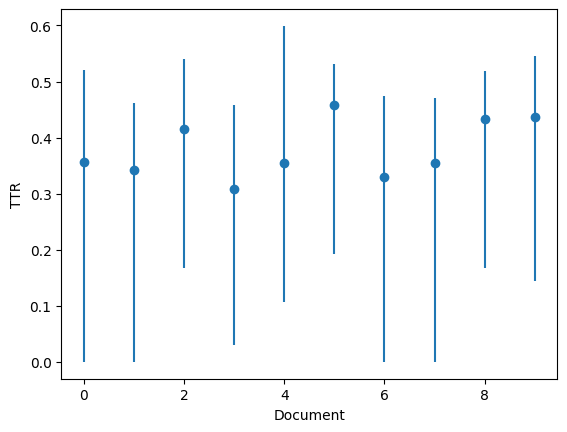

In [46]:
plt.figaspect(100)
plt.errorbar(range(len(files)), docs_ttrs[:, 2], yerr=[docs_ttrs[:, 2]-docs_ttrs[:, 1], docs_ttrs[:, 0]-docs_ttrs[:, 2]], fmt="o")
plt.xlabel("Document")
plt.ylabel("TTR")
plt.show()


ValueError: Dimensions of labels and X must be compatible

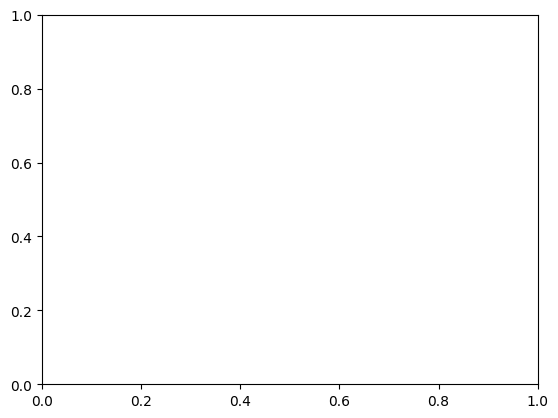

In [48]:
plt.figaspect(100)
plt.boxplot(docs_ttrs[:, 2:], labels=["Mean", "SD", "Max", "Min"])
plt.ylabel("TTR")
plt.show()


ValueError: Dimensions of labels and X must be compatible

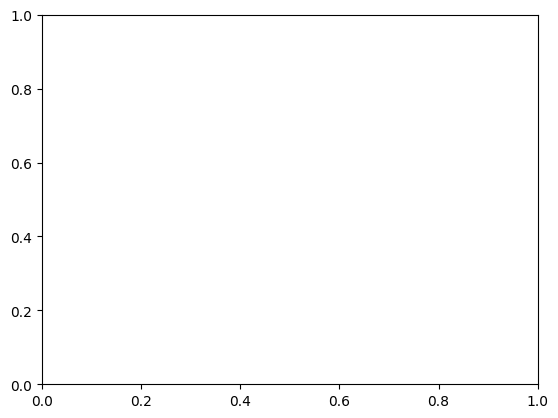

In [54]:
# Create a boxplot
plt.figaspect(100)
plt.boxplot(docs_ttrs[:, 1:], labels=["Min", "Mean", "SD", "Max"])
plt.xlabel("TTR Statistics")
plt.ylabel("TTR")
plt.show()


In [62]:
x = np.swapaxes(docs_ttrs,0,1)

x.shape

(4, 10)

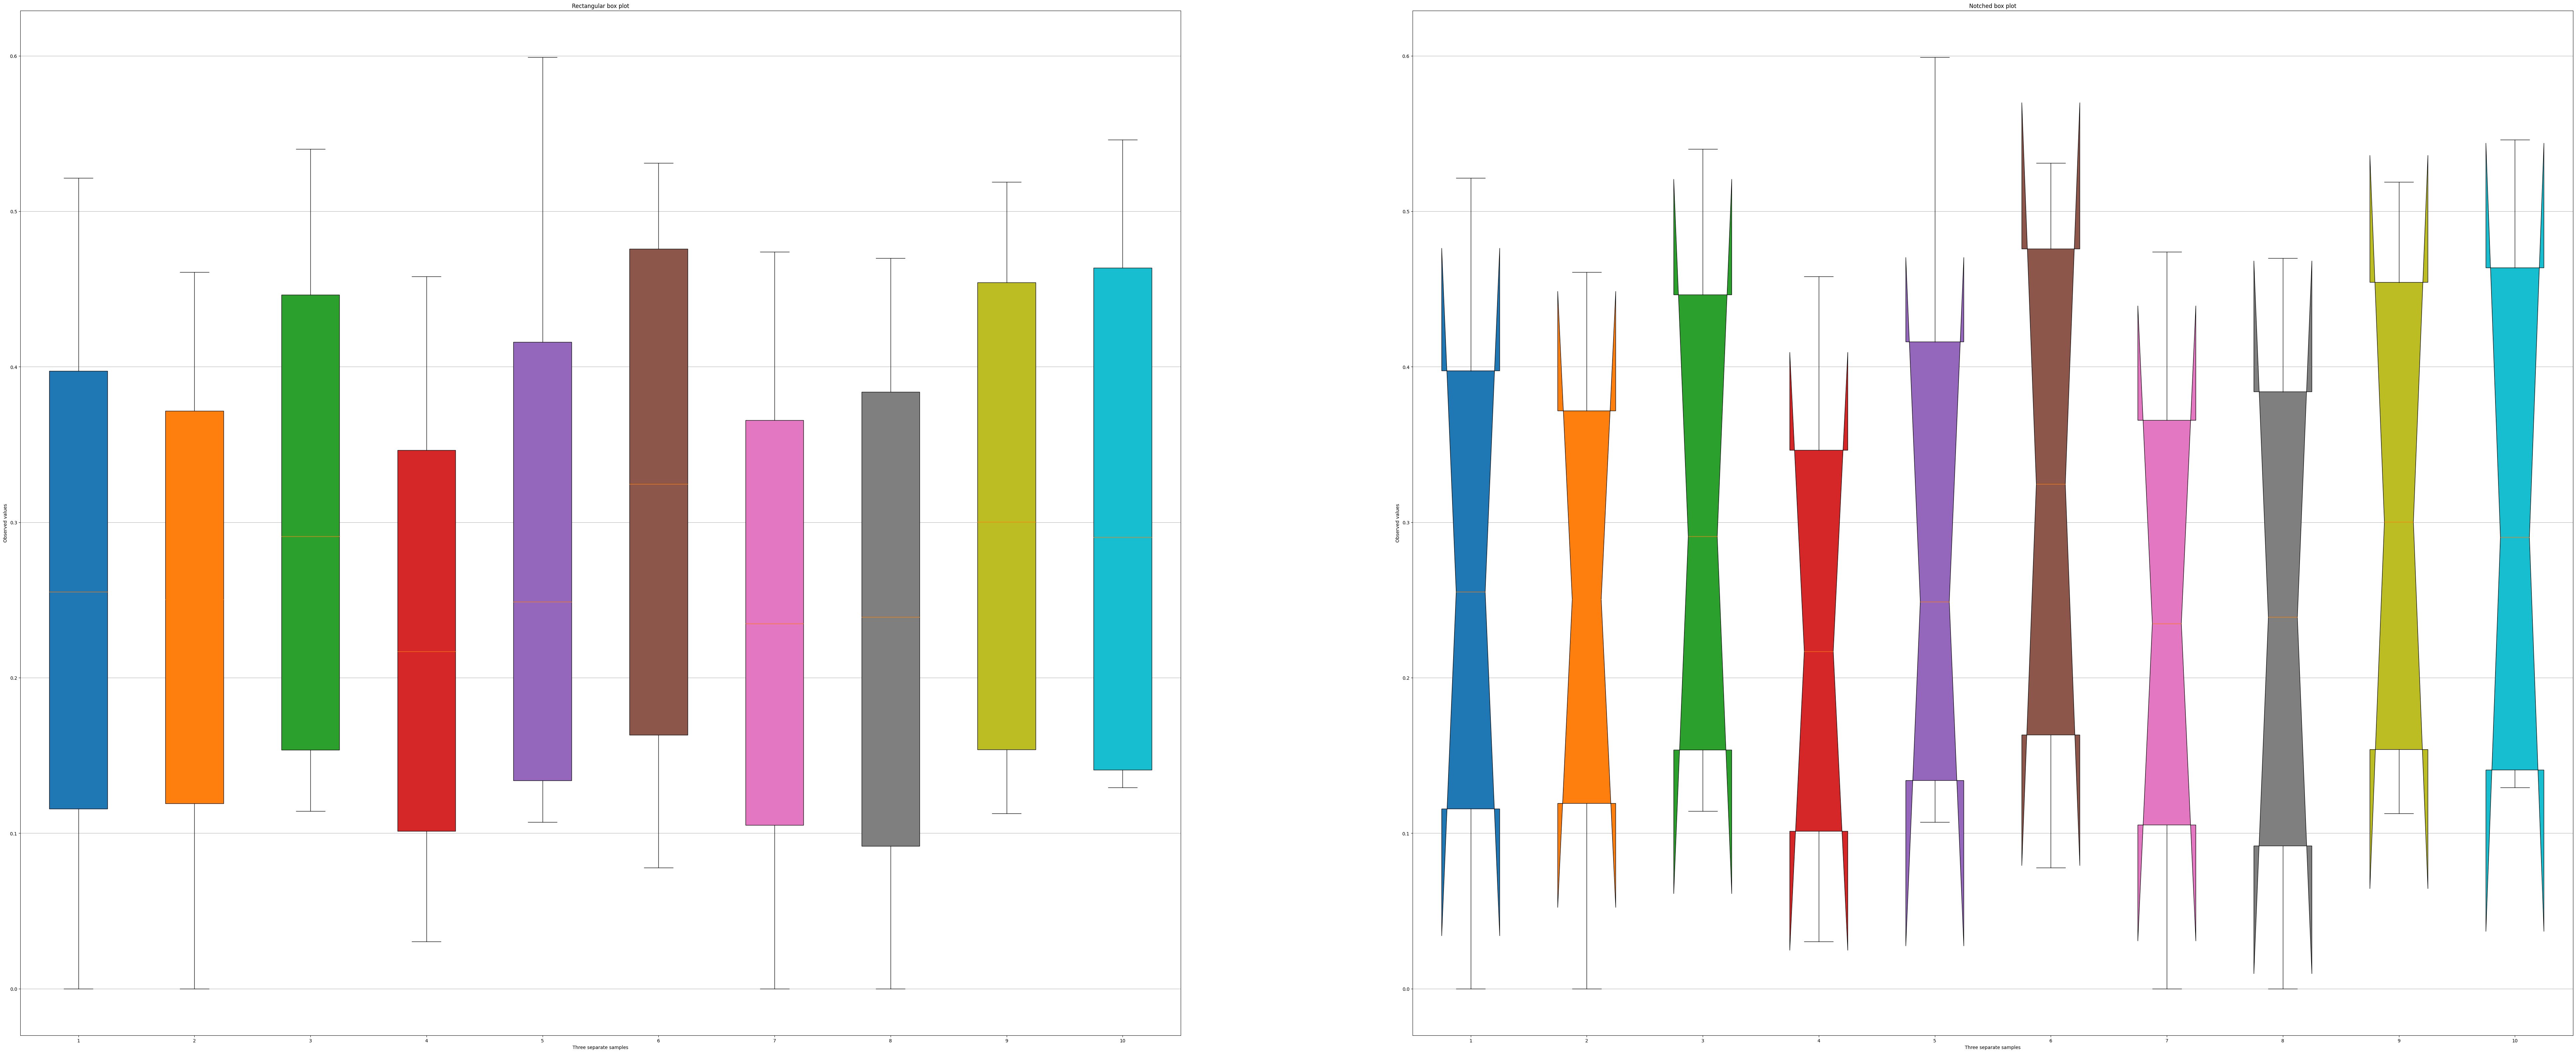

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(99, 40))

# rectangular box plot
bplot1 = ax1.boxplot(x,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(x,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     )  # will be used to label x-ticks
ax2.set_title('Notched box plot')


for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], mcolors.TABLEAU_COLORS):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()